# 다이나믹 프로그래밍

큰 문제를 작게 나누고, 같은 문제라면 한 번씩만 풀어 문제를 효율적으로 해결하는 알고리즘 기법

아래의 조건을 만족할 때 사용 가능
1. 큰 문제를 작은 문제로 나눌 수 있다.
2. 작은 문제에서 구한 정답은 그것을 포함하는 큰 문제에서도 동일하다.

In [4]:
# 피보나치 함수(Fibonacci Function)를 재귀 함수로 구현
def fibo(x):
    if x == 1 or x == 2:
        return 1
    return fibo(x-1) + fibo(x-2)

print(fibo(4))

3


- f(n) 함수에서 n이 커지면 커질수록 수행 시간이 기하급수적으로 늘어난다.
- 시간복잡도 $O(2^N)$

In [11]:
# 한 번 계산된 결과를 메모이제이션(Memoization)하기 위한 리스트 초기화
d = [0] * 100

# 피보나치 함수(Fibonacci Function)를 재귀함수로 구현(탑다운 다이나믹 프로그래밍)
def fibo(x):
    # 종료조건(1 혹은 2일 때 1을 반환)
    if x == 1 or x == 2:
        return 1
    # 이미 계산한 적이 있는 문제라면 그대로 반환
    if d[x] != 0:
        return d[x]
    # 아직 계산되지 않은 문제라면 점화식에 따라서 피보나치 결과 반환
    d[x] = fibo(x-1) + fibo(x-2)
    return d[x]

print(fibo(4))

3


- 메모이제이션: 다이나믹 프로그래밍을 구현하는 방법 중 하나
- 한 번 구한 결과를 메모리 공간에 메모 -> 같은 식을 다시 호출하면 메모한 결과를 그대로 가져오는 기법
- 시간복잡도 $O(N)$

In [9]:
d = [0] * 100

def fibo(x):
    print('f(' + str(x) + ')',end=' ')
    if x == 1 or x == 2:
        return 1
    if d[x] != 0:
        return d[x]
    d[x] = fibo(x-1) + fibo(x-2)
    return d[x]

fibo(6)

f(6) f(5) f(4) f(3) f(2) f(1) f(2) f(3) f(4) 

8

In [12]:
# 앞서 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [0] * 100

# 첫 번째 피보나치 수와 두 번째 피보나치 수는 1
d[1] = 1
d[2] = 1
n = 99

# 피보나치 함수(Fibonacci Function) 반복문으로 구현(보텀업 다이나믹 프로그래밍)
for i in range(3, n+1):
    d[i] = d[i-1] + d[i-2]

print(d[n])

218922995834555169026


#### 탑다운(Top-Down) 방식
- 하향식
- 큰 문제를 해결하기 위해 작은 문제를 호출
- 재귀함수를 이용한 코드

#### 보텀업(Bottom-Up) 방식
- 상향식
- 작은 문제부터 차근차근 답을 도출
- 반복문을 이용한 코드
- 다이나믹 프로그래밍의 전형적인 형태
- DP 테이블: 결과 저장용 리스트

---

## 1로 만들기

In [18]:
# 정수 X를 입력받기
x = int(input())

# 앞서 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [0] * 30001

# 다이나믹 프로그래밍(Dynamic Programming) 진행(보텀업)
for i in range(2, x+1):
    # 현재의 수에서 1을 빼는 경우
    d[i] = d[i-1]+1
    # 현재의 수가 2로 나누어 떨어지는 경우
    if i % 2 == 0:
        d[i] = min(d[i], d[i//2]+1)
    # 현재의 수가 3으로 나누어 떨어지는 경우
    if i % 3 == 0:
        d[i] = min(d[i], d[i//3]+1)
    # 현재의 수가 5로 나누어 떨어지는 경우
    if i % 5 == 0:
        d[i] = min(d[i], d[i//5]+1)

print(d[x])

26
3


## 개미 전사

In [31]:
# 정수 N을 입력받기
n = int(input())
# 모든 식량 정보 입력받기
array = list(map(int, input().split()))

# 앞서 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [0] * 100

# 다이나믹 프로그래밍(Dynamic Programming) 진행(보텀업)
d[0] = array[0]
d[1] = max(array[0], array[1])
for i in range(2, n):
    d[i] = max(d[i-1], d[i-2] + array[i])

# 계산된 결과 출력
print(d[n-1])

4
1 3 1 5
8


---

## 문제 1번. 가장 긴 증가하는 부분 수열

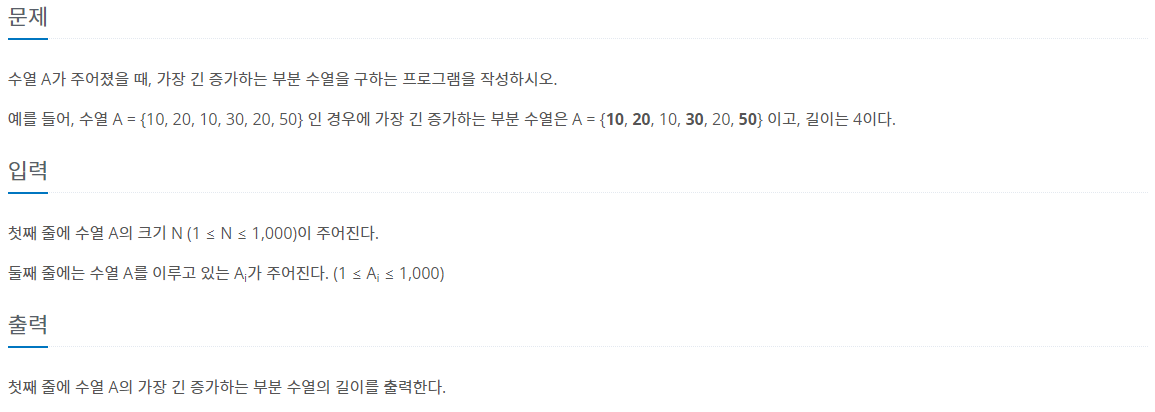

<b>증가하는 부분 수열</b>

어떠한 수열의 부분 수열들 중 오름차순인 것들을 증가하는 부분 수열



1. dp[i]의 값을 1로 초기화

2. 현재 위치(i)보다 이전에 있는 원소(j)가 작은지 확인한다. (크거나 같으면 가장 긴 증가하는 부분 수열이 될 수 없음)

3. 작다면, 현재 위치의 이전 숫자 중, dp 최댓값을 구하고 그 길이에 1을 더해주면 된다.

In [35]:
n = int(input())
arr = list(map(int, input().split()))

dp = [1 for i in range(n)]

for i in range(n):
    for j in range(i):
        if arr[i] > arr[j]:
            dp[i] = max(dp[i], dp[j]+1)

print(max(dp))

6
10 20 10 30 20 50
4


## 문제 2번. LCS

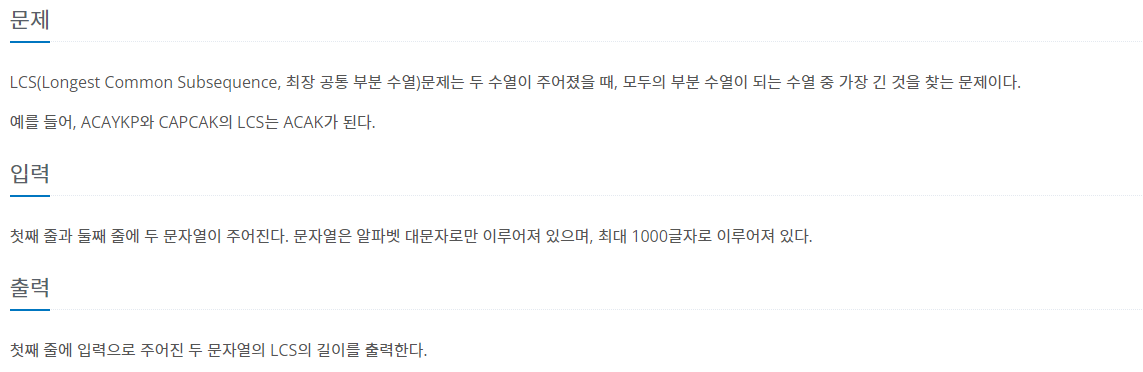

In [38]:
import sys
# read = sys.stdin.readline

word1, word2 = input(), input()
h, w = len(word1), len(word2)
cache = [[0] * (w+1) for _ in range(h+1)]

for i in range(1, h+1):
    for j in range(1, w+1):
        if word1[i-1] == word2[j-1]:
            cache[i][j] = cache[i-1][j-1] + 1
        else:
            cache[i][j] = max(cache[i][j-1], cache[i-1][j])
print(cache[-1][-1])

ACAYKP
CAPCAK
4


## 문제 3번. 평범한 배낭

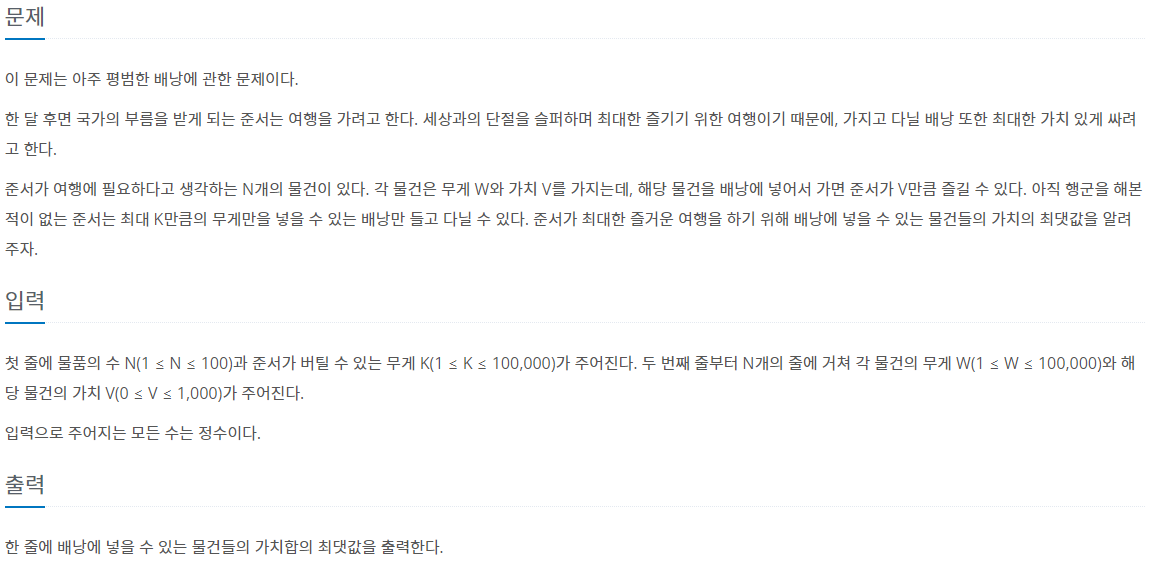

1) x축엔 가방 1~K 까지의 무게, y축은 물건 N개 개수 만큼의 배열을 만들어준다.

2) 행을 차례대로 돌며 다음과 같은 알고리즘을 수행해준다.

3-0) 현재 물건이 현재 돌고있는 무게보다 작다면 바로 [이전 물건][같은 무게] (knapsack[i-1][j]를 입력해준다.

3-1) 현재 물건을 넣어준다. 물건을 넣은 뒤의 남은 무게를 채울 수 있는 최댓값(knapsack[i-1][j-weight]을 위의 행에서 가져와 더해준다.

3-2) 현재 물건을 넣어주는 것보다. 다른 물건들로 채우는 값(knapsack[i-1][j])을 가져온다.

4) 3-1과 3-2 중 더 큰 값을 knapsack[i][j]에 저장해준다. 이 값은 현재까지의 물건들로 구성할 수 있는 가장 가치 높은 구성이다.

5) knapsack[N][K]는 곧, K무게일 때의 최댓값을 가리킨다.

In [39]:
import sys

N, K = map(int, input().split())
stuff = [[0,0]]
knapsack = [[0 for _ in range(K + 1)] for _ in range(N + 1)]

for _ in range(N):
    stuff.append(list(map(int, input().split())))


#냅색 문제 풀이
for i in range(1, N + 1):
    for j in range(1, K + 1):
        weight = stuff[i][0] 
        value = stuff[i][1]
       
        if j < weight:
            knapsack[i][j] = knapsack[i - 1][j] #weight보다 작으면 위의 값을 그대로 가져온다
        else:
            knapsack[i][j] = max(value + knapsack[i - 1][j - weight], knapsack[i - 1][j])

print(knapsack[N][K])

4 7
6 13
4 8
3 6
5 12
14
